In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn
import pandas as pd
import numpy as np
import json
import os
import random
import cv2
from PIL import *

# Overview

In [2]:
##Redbubble #4868
data_df = pd.read_json('../data/redbubble/data_dresses.json')
print('Columns: %s' % ', '.join(list(data_df.columns)))
print('Count: %d' % len(data_df[data_df.columns[0]]))

Columns: designer, dir, id, painting, painting_artist, painting_name, pictures, type, url
Count: 4868


In [3]:
unique_types = np.unique(data_df['type'])
print(unique_types)

['A-Line Dress' 'Graphic T-Shirt Dress' 'Men Baseball 34 T-Shirt'
 'Tank Top' 'Zipped Hoodie']


In [4]:
for item in unique_types:
    print('%s: %d' % (item, (data_df['type'] == item).sum()))

A-Line Dress: 944
Graphic T-Shirt Dress: 964
Men Baseball 34 T-Shirt: 383
Tank Top: 1741
Zipped Hoodie: 836


**Predicted amount of images:**

In [5]:
len(data_df[data_df.columns[0]]) * 4 #Most of images not needed!

19472

**Example entry in data-set:**

In [6]:
print(data_df.iloc[0])

designer                                                Cheesy-Puffs
dir                                                                 
id                                                                 0
painting                                            0_Mondrian_4.jpg
painting_artist                                                  NaN
painting_name                                               Mondrian
pictures           [0_Mondrian_0.jpg, 0_Mondrian_1.jpg, 0_Mondria...
type                                           Graphic T-Shirt Dress
url                https://www.redbubble.com/people/cheesy-puffs/...
Name: 0, dtype: object


**Images in example:**

In [7]:
print(data_df['pictures'].iloc[0])

['0_Mondrian_0.jpg', '0_Mondrian_1.jpg', '0_Mondrian_2.jpg', '0_Mondrian_3.jpg', '0_Mondrian_4.jpg']


In [8]:
dresses = []
paintings = []

for i in range(len(data_df['pictures'])):
    dresses.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][2]))
    paintings.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][1]))

## Poses

**Graphic T-Shirt Dress:**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
plt.rcParams["axes.edgecolor"] = "15"

t_shirt = data_df.iloc[0]['pictures']
t_shirt_images = []

for i in t_shirt:
    img = Image.open('../data/redbubble/images/' + i)
    width, height = img.size
    img = img.resize((750, 750), Image.ANTIALIAS)
    t_shirt_images.append(img)
    
print(t_shirt)
    
#Fake
axes[0].axis('off')
axes[0].imshow(t_shirt_images[0])
axes[1].axis('off')
axes[1].imshow(t_shirt_images[2])
axes[2].axis('off')
axes[2].imshow(t_shirt_images[4])

axes[0].set_aspect("equal")
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()
plt.draw()

path = 'saved_figures/t-shirt_dress_pose.png'
fig.savefig(path)

**A-Line Dress:**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.rcParams["axes.edgecolor"] = "15"

t_shirt = data_df.iloc[0]['pictures']
a_line = data_df.iloc[1]['pictures']
a_line_images = []

for i in a_line:
    img = Image.open('../data/redbubble/images/' + i)
    width, height = img.size
    img = img.resize((750, 750), Image.ANTIALIAS)
    a_line_images.append(img)

print(a_line)
    
axes[0].axis('off')
axes[0].imshow(a_line_images[0])
axes[1].axis('off')
axes[1].imshow(a_line_images[2])

axes[0].set_aspect("equal")
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()
plt.draw()

path = 'saved_figures/a-line_pose.png'
fig.savefig(path)

**Zipped Hoodie:**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.rcParams["axes.edgecolor"] = "15"

a_line = data_df.iloc[3960]['pictures']
a_line_images = []

for i in a_line:
    img = Image.open('../data/redbubble/images/' + i)
    width, height = img.size
    img = img.resize((750, 750), Image.ANTIALIAS)
    a_line_images.append(img)

print(a_line)
    
axes[0].axis('off')
axes[0].imshow(a_line_images[0])
axes[1].axis('off')
axes[1].imshow(a_line_images[2])

axes[0].set_aspect("equal")
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()
plt.draw()

path = 'saved_figures/hoodie_pose.png'
fig.savefig(path)

**Tanktop:**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.rcParams["axes.edgecolor"] = "15"

a_line = data_df.iloc[2137]['pictures']
a_line_images = []

for i in a_line:
    img = Image.open('../data/redbubble/images/' + i)
    width, height = img.size
    img = img.resize((750, 750), Image.ANTIALIAS)
    a_line_images.append(img)

print(a_line)
    
axes[0].axis('off')
axes[0].imshow(a_line_images[0])
axes[1].axis('off')
axes[1].imshow(a_line_images[2])

axes[0].set_aspect("equal")
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()
plt.draw()

path = 'saved_figures/tanktop_pose.png'
fig.savefig(path)

**Men Baseball 3/4 T-Shirt:**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.rcParams["axes.edgecolor"] = "15"

a_line = data_df.iloc[4523]['pictures']
a_line_images = []

for i in a_line:
    img = Image.open('../data/redbubble/images/' + i)
    width, height = img.size
    img = img.resize((750, 750), Image.ANTIALIAS)
    a_line_images.append(img)

print(a_line)
    
axes[0].axis('off')
axes[0].imshow(a_line_images[0])
axes[1].axis('off')
axes[1].imshow(a_line_images[2])

axes[0].set_aspect("equal")
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()
plt.draw()

path = 'saved_figures/men34_pose.png'
fig.savefig(path)

## Masks

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 3))
plt.rcParams["axes.edgecolor"] = "15"

##Mask dress and create dataset
mask_img1 = Image.open('../data/redbubble/masks/Graphic T-Shirt Dress_2.png')
mask_img2 = Image.open('../data/redbubble/masks/A-Line Dress_2.png')
mask_img3 = Image.open('../data/redbubble/masks/Men Baseball 34 T-Shirt_2.png.png')
mask_img4 = Image.open('../data/redbubble/masks/Tank Top_2.png')
mask_img5 = Image.open('../data/redbubble/masks/Zipped Hoodie.png')

#Fake
axes[0].axis('off')
axes[0].imshow(mask_img1)
axes[1].axis('off')
axes[1].imshow(mask_img2)
axes[2].axis('off')
axes[2].imshow(mask_img3)
axes[3].axis('off')
axes[3].imshow(mask_img4)
axes[4].axis('off')
axes[4].imshow(mask_img5)

axes[0].set_aspect("equal")
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()
plt.draw()

path = 'saved_figures/mask_display_viz.png'
fig.savefig(path)

## Image to Image Example

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 10))
plt.rcParams["axes.edgecolor"] = "15"

#Fake
for row in range(3):
    img = mpimg.imread(dresses[row])
    axes[row, 1].axis('off')
    axes[row, 1].imshow(img)
    img = mpimg.imread(paintings[row])
    axes[row, 0].axis('off')
    axes[row, 0].imshow(img)

    axes[row, 1].set_aspect("equal")
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()
plt.draw()

path = 'model_viz.pdf'
fig.savefig(path)

## Average pixel value

In [ ]:
##Average pixel used
img = Image.open(dresses[0])
gen_img = np.array(img, dtype='float32') 

for i in range(1, len(dresses)):
    img = np.array(Image.open(dresses[i]), dtype='float32')
    gen_img = np.add(gen_img, img)

**Over all types of clothing:**

In [ ]:
new_img = np.uint8((gen_img)//len(dresses))
fig = plt.figure()
plt.imshow(Image.fromarray(new_img))

In [ ]:
type1_dress = []
type2_dress = []
for i in range(len(data_df['pictures'])):
    if data_df['type'][i] == 'A-Line Dress':
        type1_dress.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][2]))
    else:
        type2_dress.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][2]))

In [ ]:
img = Image.open(type1_dress[0])
type1_img = np.array(img, dtype='float32') 

for i in range(1, len(type1_dress)):
    img = np.array(Image.open(type1_dress[i]), dtype='float32')
    type1_img = np.add(type1_img, img)
    
img = Image.open(type2_dress[0])
type2_img = np.array(img, dtype='float32') 

for i in range(1, len(type2_dress)):
    img = np.array(Image.open(type2_dress[i]), dtype='float32')
    type2_img = np.add(type2_img, img)

**A-Line Dress:**

In [ ]:
new_img = np.uint8((type1_img)//len(type1_dress))

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Image.fromarray(new_img))
ax2.hist(new_img.ravel(), bins=256, range=(0.0, 255), fc='k', ec='k')
ax1.set_title('Average image pixel')
ax2.set_title('Average hist pixel')
plt.show()

**Graphic T-Shirt Dress:**

In [ ]:
new_img = np.uint8((type2_img)//len(type2_dress))
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Image.fromarray(new_img))
ax2.hist(new_img.ravel(), bins=256, range=(0.0, 255), fc='k', ec='k')
ax1.set_title('Average image pixel')
ax2.set_title('Average hist pixel')
plt.show()

## Masked examples

**Graphic T-Shirt Dress:**

In [10]:
##Mask dress and create dataset
mask_img = Image.open('../data/redbubble/masks/Graphic T-Shirt Dress_2.png')
mask_img_arr = ~np.array(mask_img)

nor = (lambda x: int((x - 0)//(255-0)))
#print(np.unique(mask_img_arr))
mask_img_arr[mask_img_arr > 250] = 255
mask_img_arr[mask_img_arr < 40] = 0
mask_img_arr = np.vectorize(nor)(mask_img_arr)
#print(np.unique(mask_img_arr))

In [11]:
img = np.array(Image.open(type2_dress[4]))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 10))
axes[0].imshow(Image.fromarray(img))

img = np.array(Image.open(type2_dress[4]))
img = img * mask_img_arr
new_mask = mask_img_arr.copy()
new_mask[new_mask == 0] = 2
new_mask[new_mask == 1] = 0
new_mask[new_mask == 2] = 255
img = img + new_mask
img = Image.fromarray(np.uint8(img))

axes[1].imshow(img)
plt.show()

NameError: name 'type2_dress' is not defined

**A-Line Dress:**

In [ ]:
##Mask dress and create dataset
mask_img = Image.open('../data/redbubble/masks/A-Line Dress_2.png')
mask_img_arr = ~np.array(mask_img)

nor = (lambda x: int((x - 0)//(255-0)))
#print(np.unique(mask_img_arr))
mask_img_arr[mask_img_arr > 250] = 255
mask_img_arr[mask_img_arr < 40] = 0
mask_img_arr = np.vectorize(nor)(mask_img_arr)
#print(np.unique(mask_img_arr))

In [ ]:
img = np.array(Image.open(type1_dress[4]))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 10))
axes[0].imshow(Image.fromarray(img))

img = np.array(Image.open(type1_dress[4]))
img = img * mask_img_arr
new_mask = mask_img_arr.copy()
new_mask[new_mask == 0] = 2
new_mask[new_mask == 1] = 0
new_mask[new_mask == 2] = 255
img = img + new_mask
img = Image.fromarray(np.uint8(img))

axes[1].imshow(img)
plt.show()

# Image size manipulation

## Example

In [ ]:
SCALE  = 3/4
paintings.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][1]))#Centre images

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 10))

for row in range(3):
    # gradient between 0 and 1 for 256*256
    logo = Image.open(paintings[row])
    array = np.linspace(1,1,logo.width*logo.height*3)
    mat = np.reshape(array,(logo.width,logo.height,3))
    np.uint8(mat * 255)
    img =  Image.fromarray(np.uint8(mat * 255))
    axes[row, 1].axis('off')
    image_copy = img.copy()
    logo.thumbnail((logo.height,logo.height))
    logo = logo.resize((int(logo.width * SCALE) ,int(logo.height * SCALE)))
    
    position = int((image_copy.width - logo.width)/2), int((image_copy.height - logo.height)/5)
    image_copy.paste(logo, position)
    axes[row, 1].imshow(image_copy)
    img = mpimg.imread(dresses[row])
    axes[row, 0].axis('off')
    axes[row, 0].imshow(img)

    axes[row, 1].set_aspect("equal")


## Scaled Data-set creation

In [14]:
split_loc = paintings[0].split('/')
split_loc[2]='altered_masked_redbubble'
path = '/'.join(split_loc[0:4])
os.makedirs(path, exist_ok=True)
mask_loc = '../data/redbubble/masks/'

In [6]:
def create_scaled_dataset(dataset_loc, mask_loc, scale=[1,1], visualise=False, mask=False, pos=[1/2, 1/2]):
    #If visualse set to FALSE, images will be saved
    mask_img_tshirt = np.array(Image.open('../data/redbubble/masks/Graphic T-Shirt Dress_2.png'))
    mask_img_aline = np.array(Image.open('../data/redbubble/masks/A-Line Dress_2.png'))
    masks = {'Graphic T-Shirt Dress': mask_img_tshirt, 'A-Line Dress': mask_img_aline}
    
    for i in masks:
        masks[i] = ~np.array(masks[i])
        nor = (lambda x: int((x - 0)//(255-0)))
        masks[i][masks[i] > 250] = 255
        masks[i][masks[i] < 40] = 0
        masks[i] = np.vectorize(nor)(masks[i])
    
    if visualise:
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 10))    
        
    for i in range(0, len(paintings)):
        paint_name = paintings[i].split('/')[4]
        dress_name = dresses[i].split('/')[4]
        dress = Image.open(dresses[i])#mpimg.imread(dresses[i])
        painting = Image.open(paintings[i])
        painting = painting.resize((dress.height, dress.width))

        #White canvas
        array = np.linspace(1,1,painting.width*painting.height*3)
        mat = np.reshape(array,(painting.height,painting.width,3))
        white_background =  Image.fromarray(np.uint8(mat * 255))
        scaled_copy = white_background.copy()

        #Scaled copy
        painting = painting.resize((int(painting.width * scale[0]), int(painting.height * scale[1])))
        #painting.thumbnail((int(painting.width * scale[0]), int(painting.height * scale[1])))
        position = int((scaled_copy.width - painting.width) * pos[0]), \
                   int((scaled_copy.height - painting.height ) *  pos[1])
        scaled_copy.paste(painting, position)
        
        #Apply mask if option true
        if mask:
            dress_type = data_df['type'][i]
            mask_img_arr = masks[dress_type]
            dress = np.array(dress) * mask_img_arr
            new_mask = mask_img_arr.copy()
            new_mask[new_mask == 0] = 2
            new_mask[new_mask == 1] = 0
            new_mask[new_mask == 2] = 255
            dress = dress + new_mask
            dress = Image.fromarray(np.uint8(dress))
        
        if visualise:
            #axes[i, 0].axis('off')
            axes[i, 0].imshow(dress)
            #axes[i, 1].axis('off')
            axes[i, 1].set_aspect("equal")
            axes[i, 1].imshow(scaled_copy)
            #fig.savefig(os.path.join(path, dress_name), dpi=96, interpolation='none')  
            if i == 2:
                break;
        else:
            scaled_copy.save(os.path.join(path, paint_name))
            dress.save(os.path.join(path, dress_name))
        #dress.show() #Testing only!
        #scaled_copy.show() #Testing only    

In [ ]:
create_scaled_dataset(path, mask_loc, visualise=False, mask=True)

In [ ]:
create_scaled_dataset(path, mask_loc, scale=[3/4, 3/4], visualise=False, mask=True)

In [ ]:
create_scaled_dataset(path, mask_loc, scale=[1/2,1/2], visualise=False, mask=True)

In [8]:
create_scaled_dataset(path, mask_loc, scale=[1/4,1/4], visualise=False, mask=True)

KeyError: 'Tank Top'

In [11]:
create_scaled_dataset(path, mask_loc, scale=[1/2, 2/3], visualise=False, mask=True, pos=[1/2,8/9])

KeyError: 'Tank Top'

In [13]:
create_scaled_dataset(path, mask_loc, scale=[1/4, 2/3], visualise=False, mask=True, pos=[1/2,8/9])

KeyError: 'Tank Top'

In [16]:
create_scaled_dataset(path, mask_loc, scale=[2/12, 7/12], visualise=False, mask=True, pos=[1/2,8/9])

KeyError: 'Tank Top'

## Creating Images for Descriptors

In [11]:
split_loc = paintings[0].split('/')
split_loc[2]='altered_masked_redbubble'
loc1 = '../data/altered_masked_redbubble/images'
loc2 = '../data/positive_redbubble'
loc3 = '../data/negative_redbubble'

dresses_des = []

for i in range(len(data_df['pictures'])):
    if data_df['type'].iloc[i] == 'Graphic T-Shirt Dress':
        dresses_des.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][2]))
    
print(len(dresses_des))

'''for i in dresses_des:
    dress_name = i.split('/')[4]
    img = np.array(Image.open(i))
    img = img * mask_img_arr
    new_mask = mask_img_arr.copy()
    new_mask[new_mask == 0] = 2
    new_mask[new_mask == 1] = 0
    new_mask[new_mask == 2] = 255
    img = img + new_mask
    img = img[290:970, 260:710]#Manual mask
    img = Image.fromarray(np.uint8(img))
    #img.show()
    img.save(os.path.join(loc2, dress_name))
    #try:
    #    os.remove(os.path.join(loc1, dress_name))
    #except Exception:
    #    print(dress_name)
'''   
dresses_des = []

for i in range(len(data_df['pictures'])):
        #if not data_df['type'].iloc[i] == 'Graphic T-Shirt Dress':
            dresses_des.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][2]))
            dresses_des.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][0]))
            dresses_des.append('../data/redbubble/images/%s' %  (data_df['pictures'].iloc[i][1]))
    
print(len(dresses_des))
count = 0
for i in dresses_des:
    if count > 1000:
        break
    dress_name = i.split('/')[4]
    img = Image.open(i)
    img.save(os.path.join(loc3, dress_name))
    count += 1
    #try:
    #    os.remove(os.path.join(loc1, dress_name))
    #except Exception:
    #    print(dress_name)

964
14604


# Adding additional data

In [ ]:
og_df.tail(1)

In [ ]:
from shutil import copyfile
og_json_loc = 'data_dresses.json'
og_dir_loc = '../data/redbubble/images/'
to_join_json_loc = '../utils/t-shirt_again.json'
to_join_dir_loc = '../utils/all_mens/'
og_df = pd.read_json(og_json_loc)
new_df = pd.read_json(to_join_json_loc, lines=True)
last_id = int(og_df['id'].tail(1) + 1)

for index, row in new_df.iterrows():
    if len(row['pictures']) > 0 :
        row['id'] = last_id
        row['dir'] = ''
        row['painting'] = row['painting'].split('/')[1]
        img_split = row['painting'].split('_')
        img_split[0] = str(last_id)
        row['painting'] = '_'.join(img_split)
        count = 0
        for i in row['pictures']:
            img_split = i.split('/')
            i = img_split[1]
            src = os.path.join(to_join_dir_loc, i)
            img_split = i.split('_')
            img_split[0] = str(last_id)
            img_name = '_'.join(img_split)
            dst = os.path.join(og_dir_loc, img_name)
            row['pictures'][count] = img_name
            count += 1
            copyfile(src, dst)
        og_df = og_df.append(row)
        last_id += 1

In [ ]:
og_df

In [ ]:
out = og_df.to_json(orient='records')
with open('data_dresses.json', 'w') as f:
    f.write(out)

In [ ]:
og_json_loc = 'data_dresses.json'
og_df = pd.read_json(og_json_loc)
print(np.unique(og_df['type']))

# Plots for GAN losses

In [ ]:
#normal = pd.read_csv('tensorboard_results/run_larger_.-tag-loss_D_A.csv')
#scale_75 = pd.read_csv('tensorboard_results/run_porp_.-tag-loss_D_A.csv')
#scale_50 = pd.read_csv('tensorboard_results/run_smaller_.-tag-loss_D_A.csv')
normal = pd.read_csv('tensorboard_results/manual_manip_scale/run_Normal_.-tag-loss_D_A.csv')
scale_25 = pd.read_csv('tensorboard_results/manual_manip_scale/run_Scaled to 25%_.-tag-loss_D_A.csv')
scale_50 = pd.read_csv('tensorboard_results/manual_manip_scale/run_Scaled to 50%_.-tag-loss_D_A.csv')
scale_75 = pd.read_csv('tensorboard_results/manual_manip_scale/run_Scaled to 75%_.-tag-loss_D_A.csv')
print(normal.columns)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
normal_lime = plt.plot(normal['Step'], normal['Value'])
scale_75_lime = plt.plot(scale_75['Step'], scale_75['Value'])
scale_50_lime = plt.plot(scale_50['Step'], scale_50['Value'])
scale_25_lime = plt.plot(scale_25['Step'], scale_25['Value'])
#line_chart2 = plt.plot(range(1,12), sales2)
plt.title('Losses for D_A')
plt.xlabel('Step')
plt.ylabel('Loss')
axes = plt.gca()
axes.set_ylim([0,0.6])
plt.legend(['larger than dress', 'proportional to dress', 'smaller than dress'], loc=1)
plt.show()
path = 'saved_figures/manual_DA_loss_dress.pdf'
fig.savefig(path, format='pdf')

In [ ]:
from shutil import copyfile

for i in type2_dress:
    copyfile(i, i.replace('redbubble/images', 'HOG_Test'))

# Plot for FID scores

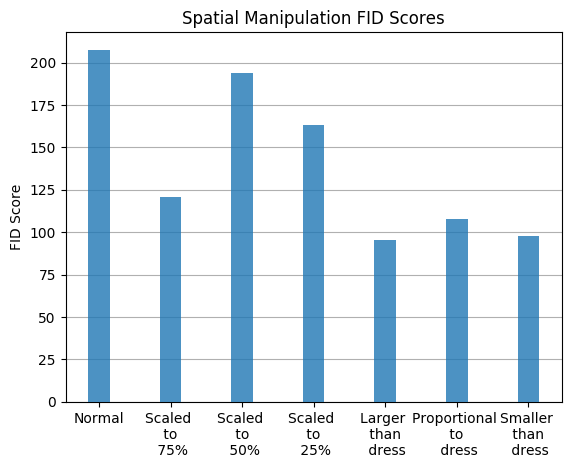

In [52]:
plt.rcdefaults()
fid_test = pd.read_csv('../fid_results.csv')
objects = ('Normal',
           'Scaled \n to \n 75%',
           'Scaled \n to \n 50%',
           'Scaled \n to \n 25%',
           'Larger \n than \n dress', 
           'Proportional \n to \n dress', 
           'Smaller \n than \n dress')
y_pos = np.arange(len(objects))
performance = [
    float(fid_test[fid_test['model'] == 'Normal']['value']),
    float(fid_test[fid_test['model'] == 'Scaled_to_75%']['value']),
    float(fid_test[fid_test['model'] == 'Scaled_to_50%']['value']),          
    float(fid_test[fid_test['model'] == 'Scaled_to_25%']['value']),
    float(fid_test[fid_test['model'] == 'larger_than_dress']['value']),
    float(fid_test[fid_test['model'] == 'proportional_to_dress']['value']),
    float(fid_test[fid_test['model'] == 'smaller_than_dress']['value'])
]
fig, ax = plt.subplots(1, 1)
ax = plt.gca()
ax.grid(True)
ax.xaxis.grid(False)
#ax.grid(zorder=0)
plt.bar(y_pos, performance, align='center', alpha=0.8,  width=0.3, 
        zorder=3)
plt.xticks(y_pos, objects)
plt.ylabel('FID Score')
plt.title('Spatial Manipulation FID Scores')
plt.show()
path = 'saved_figures/spatial_FID_scores.pdf'
fig.savefig(path, format='pdf')

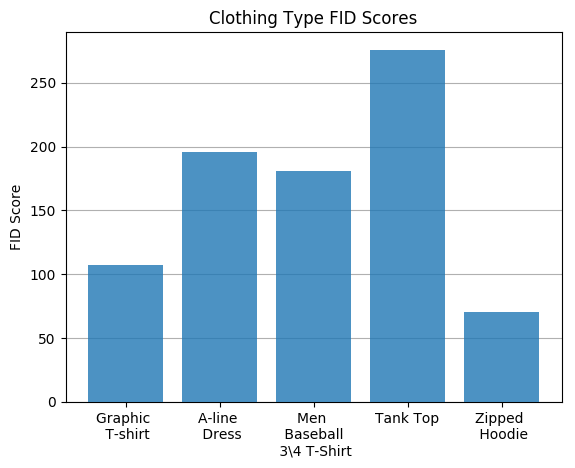

In [2]:
plt.rcdefaults()
fid_test = pd.read_csv('../fid_results.csv')
objects = ('Graphic \n T-shirt',
           'A-line \n Dress',
           'Men \n Baseball \n 3\\4 T-Shirt',
           'Tank Top',
           'Zipped \n Hoodie', 
           )
y_pos = np.arange(len(objects))
performance = [
    float(fid_test[fid_test['model'] == 'FashionNet']['value']),
    float(fid_test[fid_test['model'] == 'A_line_dress']['value']),
    float(fid_test[fid_test['model'] == '34_mens_shirt']['value']),          
    float(fid_test[fid_test['model'] == 'Tank_Top']['value']),
    float(fid_test[fid_test['model'] == 'zipped_hoodie']['value']),
]
fig, ax = plt.subplots(1, 1)
ax = plt.gca()
ax.grid(True)
ax.xaxis.grid(False)
#ax.grid(zorder=0)
plt.bar(y_pos, performance, align='center', alpha=0.8,  width=0.8, 
        zorder=3)
plt.xticks(y_pos, objects)
plt.ylabel('FID Score')
plt.title('Clothing Type FID Scores')
plt.show()
path = 'saved_figures/clothing_type_FID_scores.pdf'
fig.savefig(path, format='pdf')

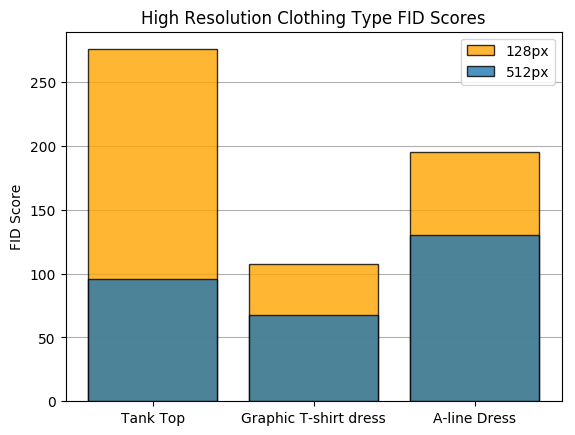

In [22]:
plt.rcdefaults()
fid_test = pd.read_csv('../fid_results.csv')
objects = ('Tank Top',
           'Graphic T-shirt dress',
           'A-line Dress',
           )
y_pos = np.arange(len(objects))
performance = [
    float(fid_test[fid_test['model'] == 'tank_top_high_res_content']['value']),
    float(fid_test[fid_test['model'] == 'graphic_high_res_content']['value']),
    float(fid_test[fid_test['model'] == 'a_line_high_res_content']['value']),          
]

y_pos = np.arange(len(objects))
performance2 = [
    float(fid_test[fid_test['model'] == 'Tank_Top']['value']),
    float(fid_test[fid_test['model'] == 'FashionNet']['value']),
    float(fid_test[fid_test['model'] == 'A_line_dress']['value']),          
]
fig, ax = plt.subplots(1, 1)
ax = plt.gca()
ax.grid(True)
ax.xaxis.grid(False)
#ax.grid(zorder=0)
plt.bar(y_pos, performance2, align='center', alpha=0.8,  width=0.8, 
        zorder=3, color='orange', edgecolor='black')
plt.bar(y_pos, performance, align='center', alpha=0.8,  width=0.8, 
        zorder=3, edgecolor='black')
plt.legend(['128px', '512px'],loc=1)
plt.xticks(y_pos, objects)
plt.ylabel('FID Score')
plt.title('High Resolution Clothing Type FID Scores')
plt.show()
path = 'saved_figures/high_res_FID_scores.pdf'
fig.savefig(path, format='pdf')

# Input Output Figures

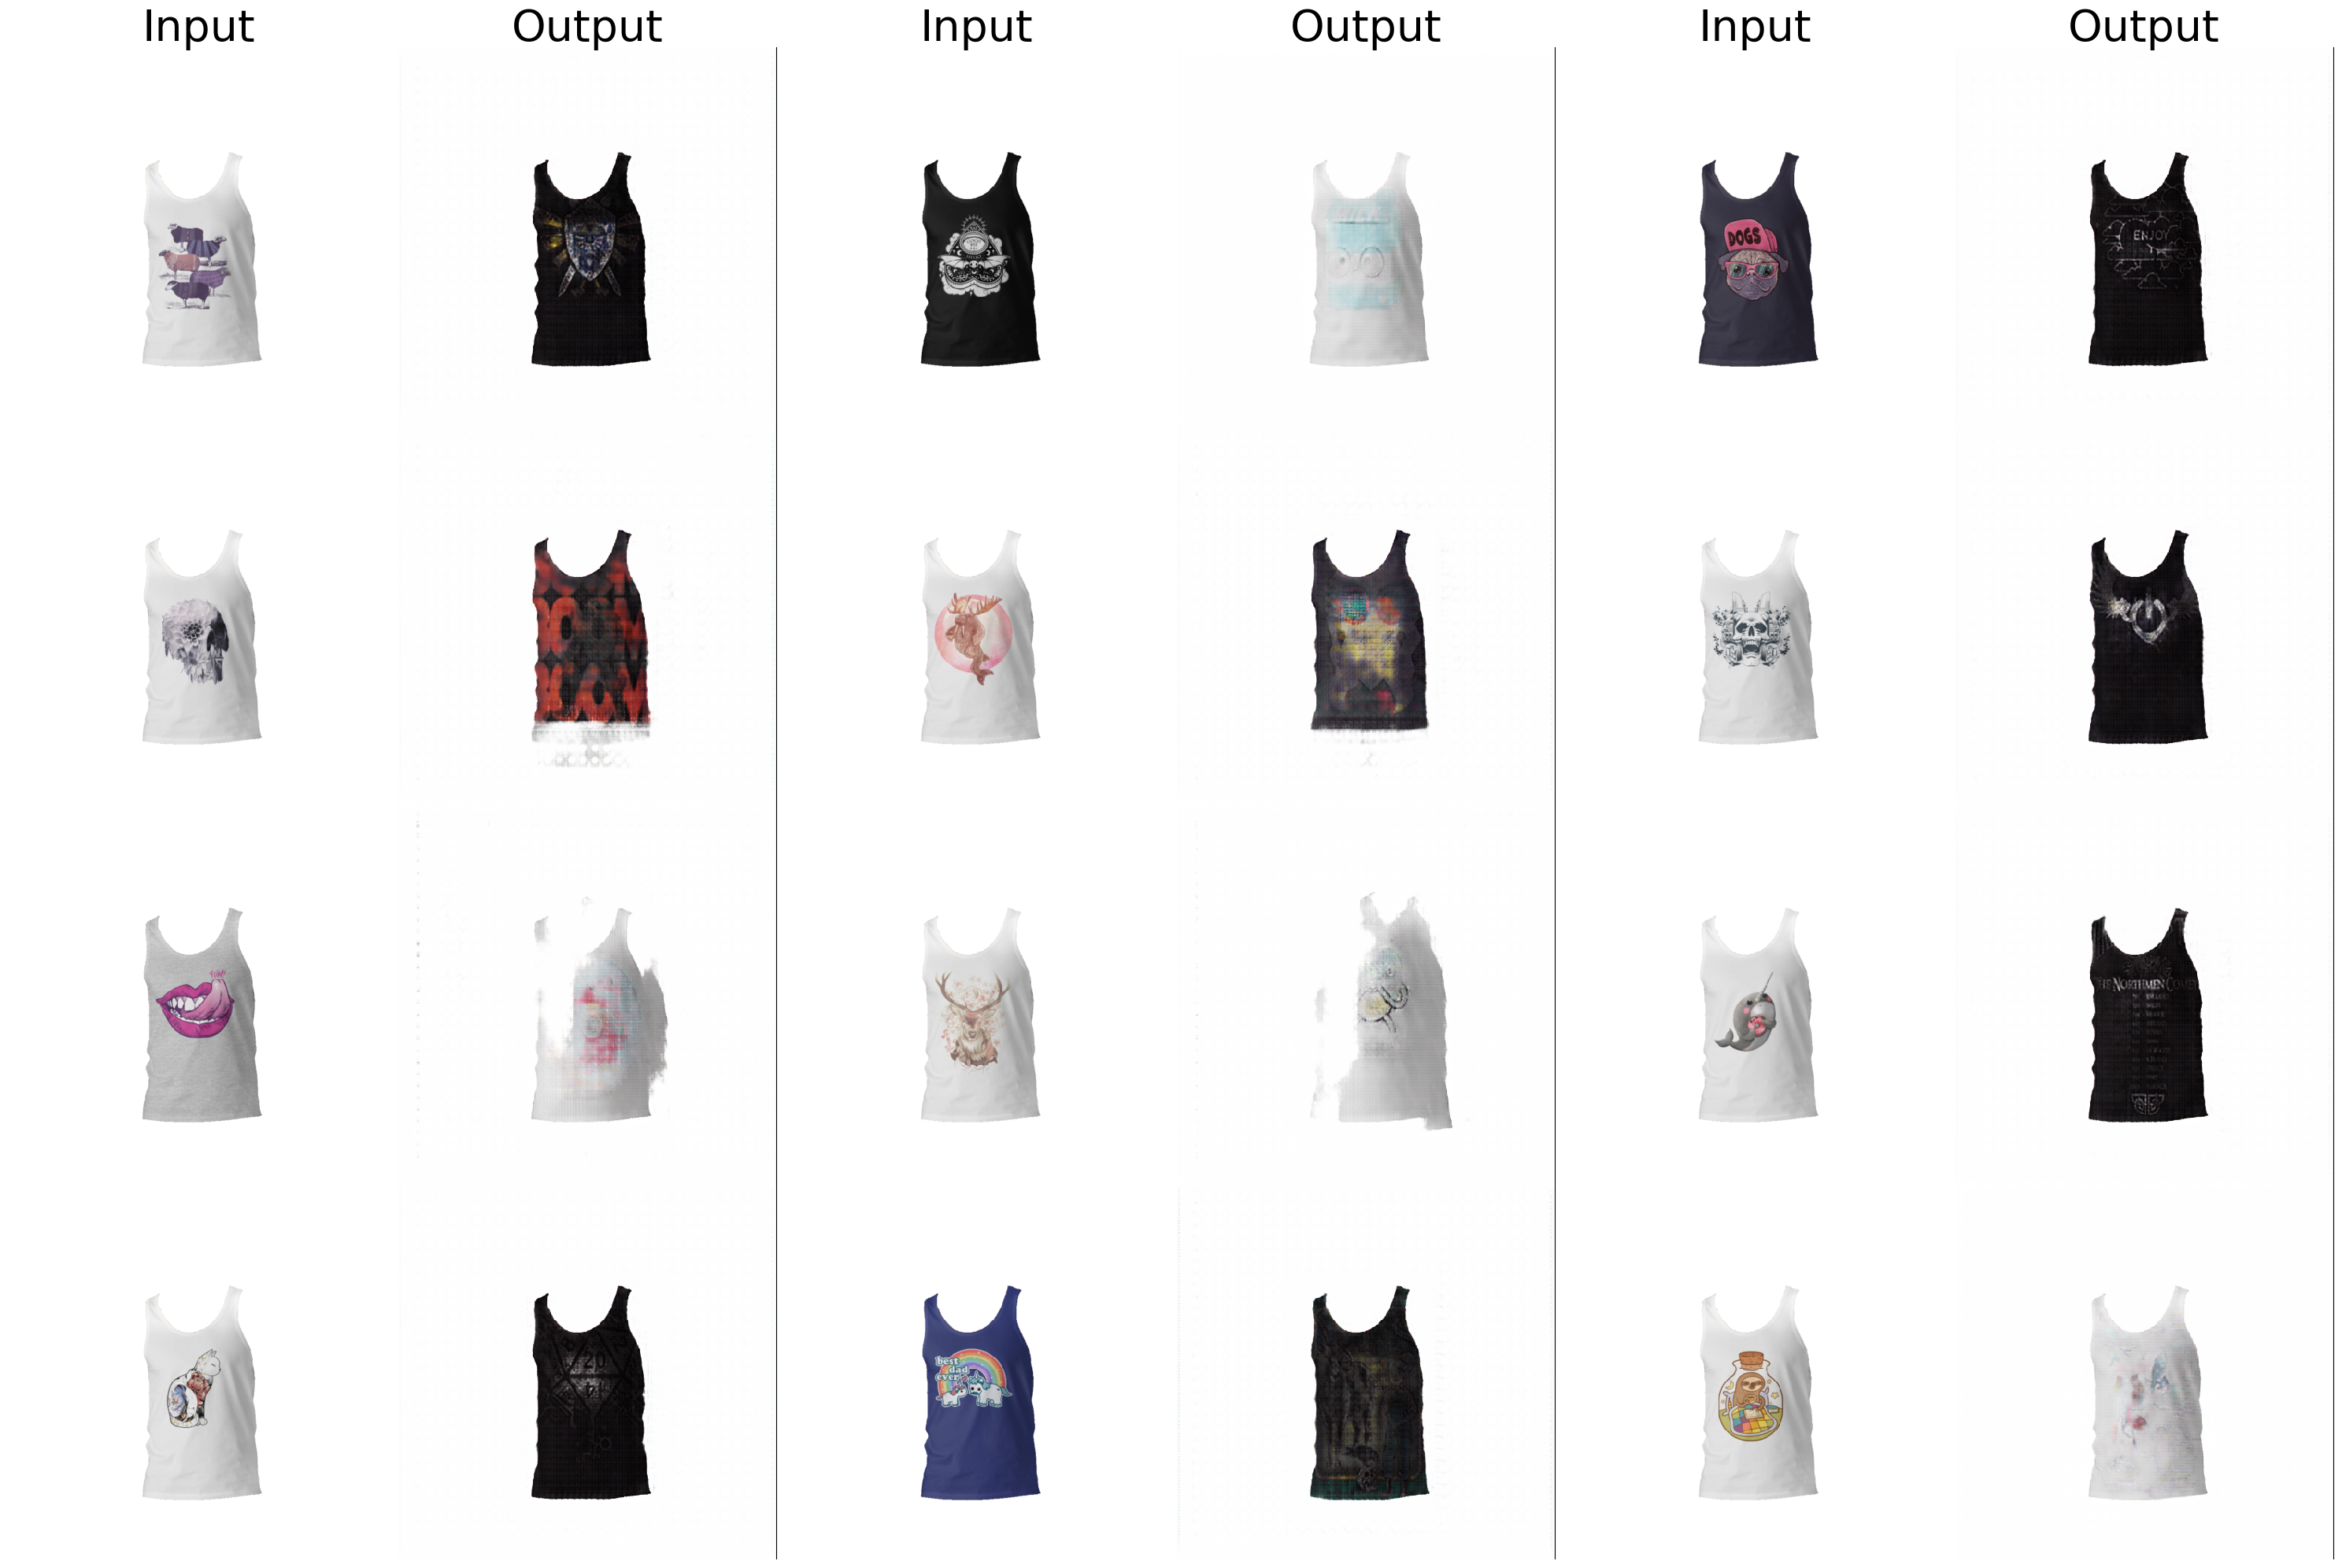

<Figure size 640x480 with 0 Axes>

In [3]:
import glob
import pathlib
import random
nrows = 4
ncols = 6
fake_dir = '../fake_test'
fig, axes = plt.subplots(nrows, ncols, figsize=(30, 20))

#axes[i, 0].axis('off')
path = pathlib.Path(fake_dir)
fake_files = list(path.glob('*.png'))
fake_files = list(filter(lambda x: 'fid' in str(x), fake_files))
path = pathlib.Path(fake_dir)
real_files = list(path.glob('*.png'))
real_files = list(filter(lambda x: 'real' in str(x), real_files))

real_files.sort()
fake_files.sort()
random_index = random.randrange(0, len(fake_files), 1)


count = 0
for j in range(0, ncols, 2):
    axes[0, j].set_title('Input', size = 40)
    axes[0, j+1].set_title('Output', size = 40)
    for i in range(nrows):
        num = random.randrange(0, len(fake_files), 1)
        fake_img = Image.open(os.path.join(fake_dir, fake_files[num]))
        real_img = Image.open(os.path.join(fake_dir, real_files[num]))
        axes[i, j+1].imshow(fake_img)
        axes[i, j].imshow(real_img)
        
        #Turn off axis
        axes[i, j+1].spines['left'].set_visible(False)
        axes[i, j+1].spines['top'].set_visible(False)
        axes[i, j+1].spines['bottom'].set_visible(False)
        axes[i, j+1].yaxis.set_tick_params(size=0)
        axes[i, j+1].xaxis.set_tick_params(size=0)
        plt.setp(axes[i, j+1].get_yticklabels(), visible=False)
        plt.setp(axes[i, j+1].get_xticklabels(), visible=False)
        
        axes[i, j].spines['left'].set_visible(False)
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].spines['bottom'].set_visible(False)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].yaxis.set_tick_params(size=0)
        axes[i, j].xaxis.set_tick_params(size=0)
        plt.setp(axes[i, j].get_yticklabels(), visible=False)
        plt.setp(axes[i, j].get_xticklabels(), visible=False)
        
        axes[i, j].set_aspect("equal")
        axes[i, j+1].set_aspect("equal")
        count += 1
        
fig.tight_layout()
plt.subplots_adjust(wspace=0.00, hspace=0.0)
plt.show()
plt.draw()
fig.savefig('saved_figures/tank_top_high_res2.pdf', format='pdf', dpi=96, interpolation='none')  